In [72]:
import pandas as pd #importing the file
import seaborn as sns # For plots
import matplotlib.pyplot as plt #For plots
%matplotlib inline
import numpy as np
np.warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [2]:
vehicle_data=pd.read_csv("vehicle.csv")

In [3]:
vehicle_data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [4]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

There are 19 columns attributes in the dataset 14 of  type Float and 4 of type Int and a class attributte which has values like Van,Car & Bus

In [3]:
#Renaming the column
vehicle_data.rename(columns={"pr.axis_aspect_ratio":"pr_axis_aspect_ratio","max.length_aspect_ratio":"max_length_aspect_ratio",
                    "pr.axis_rectangularity":"pr_axis_rectangularity","max.length_rectangularity":"max_length_rectangularity",
                    "scaled_variance.1":"scaled_variance_1","scaled_radius_of_gyration.1":"scaled_radius_of_gyration_1",
                    "skewness_about.1":"skewness_about_1","skewness_about.2":"skewness_about_2"},inplace=True)

In [193]:
dup=vehicle_data.duplicated()
if sum(dup)==0:
    print("There are no duplicate records in the dataset")
else:
    print("There are {} duplicate records in the dataset".format(sum(dup)))

There are no duplicate records in the dataset


In [5]:
nv=pd.DataFrame(vehicle_data.isna().sum())
nv['columns']=vehicle_data.columns.tolist()
for i in range(0,19):
    if (nv[0][i]>0):
        print("{} column has {} null values".format(nv['columns'][i],nv[0][i]))

circularity column has 5 null values
distance_circularity column has 4 null values
radius_ratio column has 6 null values
pr_axis_aspect_ratio column has 2 null values
scatter_ratio column has 1 null values
elongatedness column has 1 null values
pr_axis_rectangularity column has 3 null values
scaled_variance column has 3 null values
scaled_variance_1 column has 2 null values
scaled_radius_of_gyration column has 2 null values
scaled_radius_of_gyration_1 column has 4 null values
skewness_about column has 6 null values
skewness_about_1 column has 1 null values
skewness_about_2 column has 1 null values


# Univariant Analysis


----------------------------------------compactness----------------------------------------

Maximum compactness : 119
Minimum compactness : 73
Average compactness : 93.67848699763593


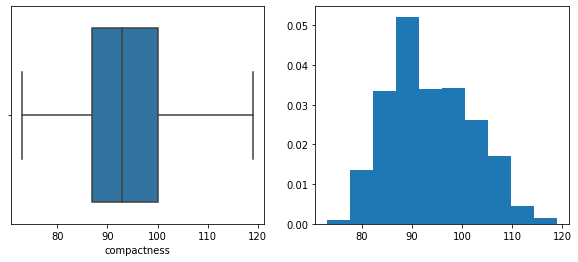

There are 0 outliers in the compactness data

----------------------------------------circularity----------------------------------------

Maximum circularity : 59.0
Minimum circularity : 33.0
Average circularity : 44.828775267538646


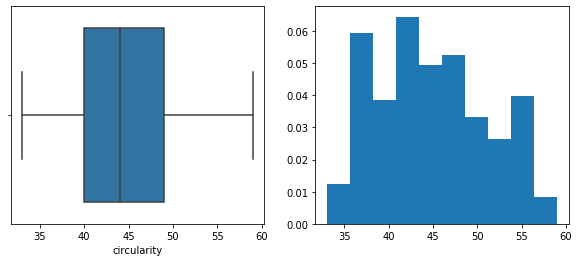

There are 0 outliers in the circularity data

----------------------------------------distance_circularity----------------------------------------

Maximum distance_circularity : 112.0
Minimum distance_circularity : 40.0
Average distance_circularity : 82.1104513064133


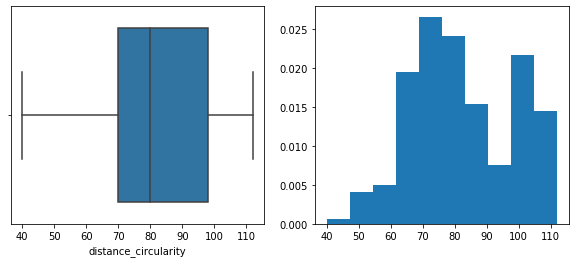

There are 0 outliers in the distance_circularity data

----------------------------------------radius_ratio----------------------------------------

Maximum radius_ratio : 333.0
Minimum radius_ratio : 104.0
Average radius_ratio : 168.88809523809525


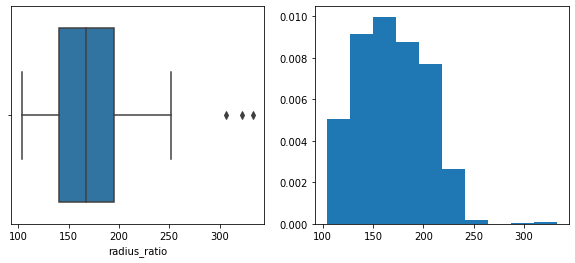

There are 3 outliers in the radius_ratio data

----------------------------------------pr_axis_aspect_ratio----------------------------------------

Maximum pr_axis_aspect_ratio : 138.0
Minimum pr_axis_aspect_ratio : 47.0
Average pr_axis_aspect_ratio : 61.67890995260664


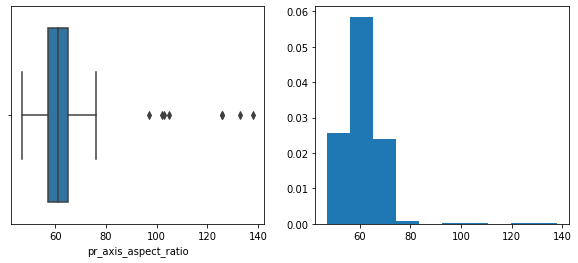

There are 8 outliers in the pr_axis_aspect_ratio data

----------------------------------------max_length_aspect_ratio----------------------------------------

Maximum max_length_aspect_ratio : 55
Minimum max_length_aspect_ratio : 2
Average max_length_aspect_ratio : 8.567375886524824


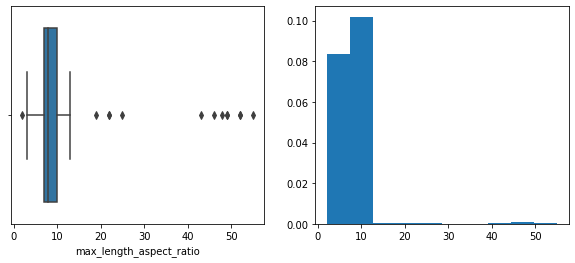

There are 13 outliers in the max_length_aspect_ratio data

----------------------------------------scatter_ratio----------------------------------------

Maximum scatter_ratio : 265.0
Minimum scatter_ratio : 112.0
Average scatter_ratio : 168.901775147929


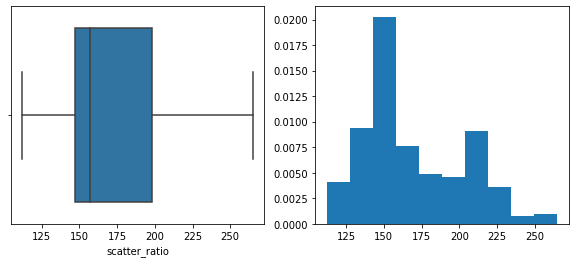

There are 0 outliers in the scatter_ratio data

----------------------------------------elongatedness----------------------------------------

Maximum elongatedness : 61.0
Minimum elongatedness : 26.0
Average elongatedness : 40.933727810650886


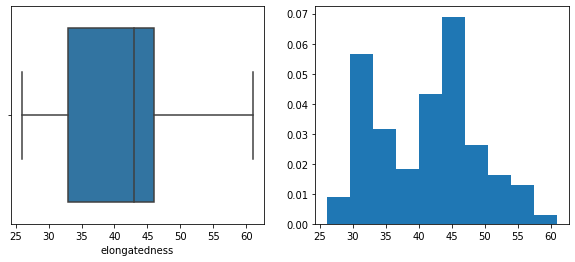

There are 0 outliers in the elongatedness data

----------------------------------------pr_axis_rectangularity----------------------------------------

Maximum pr_axis_rectangularity : 29.0
Minimum pr_axis_rectangularity : 17.0
Average pr_axis_rectangularity : 20.582443653618032


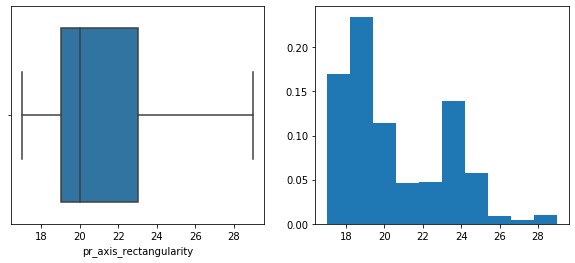

There are 0 outliers in the pr_axis_rectangularity data

----------------------------------------max_length_rectangularity----------------------------------------

Maximum max_length_rectangularity : 188
Minimum max_length_rectangularity : 118
Average max_length_rectangularity : 147.99881796690306


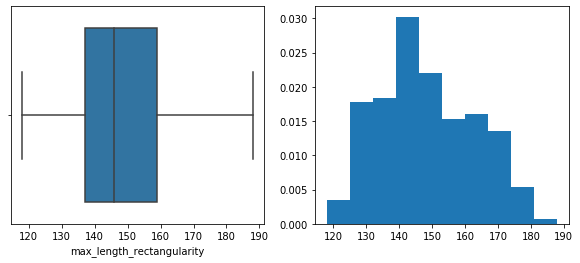

There are 0 outliers in the max_length_rectangularity data

----------------------------------------scaled_variance----------------------------------------

Maximum scaled_variance : 320.0
Minimum scaled_variance : 130.0
Average scaled_variance : 188.63107947805457


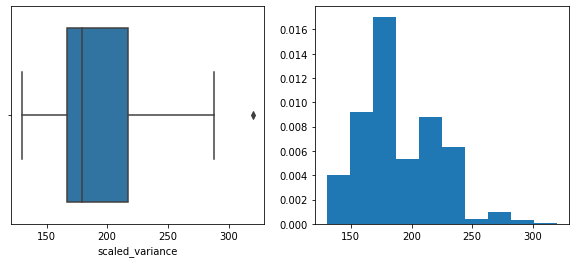

There are 1 outliers in the scaled_variance data

----------------------------------------scaled_variance_1----------------------------------------

Maximum scaled_variance_1 : 1018.0
Minimum scaled_variance_1 : 184.0
Average scaled_variance_1 : 439.49407582938386


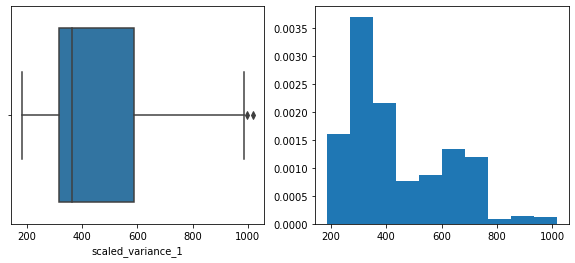

There are 2 outliers in the scaled_variance_1 data

----------------------------------------scaled_radius_of_gyration----------------------------------------

Maximum scaled_radius_of_gyration : 268.0
Minimum scaled_radius_of_gyration : 109.0
Average scaled_radius_of_gyration : 174.70971563981044


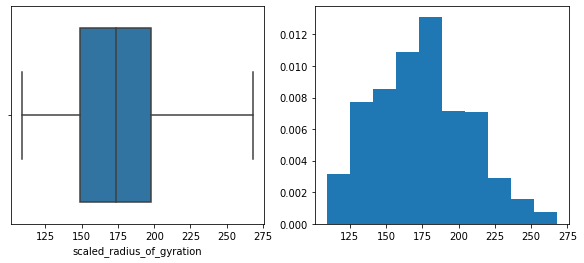

There are 0 outliers in the scaled_radius_of_gyration data

----------------------------------------scaled_radius_of_gyration_1----------------------------------------

Maximum scaled_radius_of_gyration_1 : 135.0
Minimum scaled_radius_of_gyration_1 : 59.0
Average scaled_radius_of_gyration_1 : 72.44774346793349


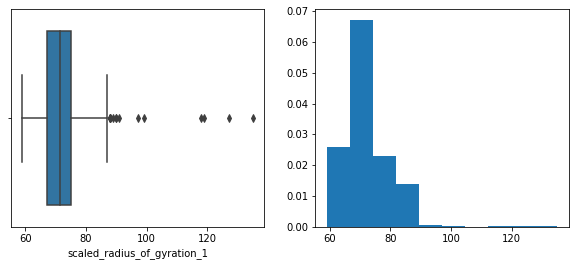

There are 15 outliers in the scaled_radius_of_gyration_1 data

----------------------------------------skewness_about----------------------------------------

Maximum skewness_about : 22.0
Minimum skewness_about : 0.0
Average skewness_about : 6.364285714285714


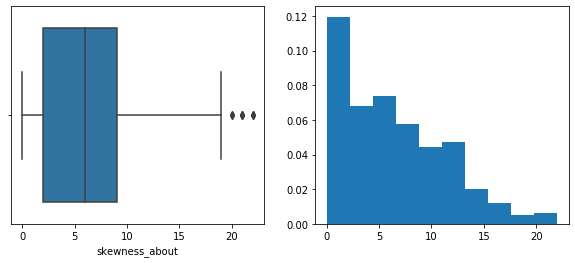

There are 12 outliers in the skewness_about data

----------------------------------------skewness_about_1----------------------------------------

Maximum skewness_about_1 : 41.0
Minimum skewness_about_1 : 0.0
Average skewness_about_1 : 12.602366863905326


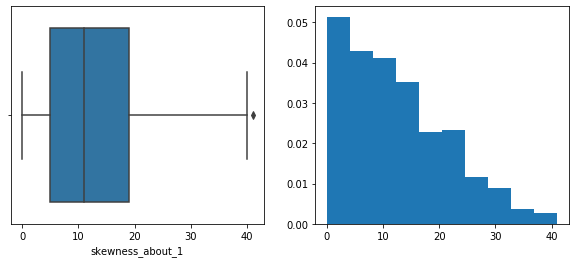

There are 1 outliers in the skewness_about_1 data

----------------------------------------skewness_about_2----------------------------------------

Maximum skewness_about_2 : 206.0
Minimum skewness_about_2 : 176.0
Average skewness_about_2 : 188.91952662721894


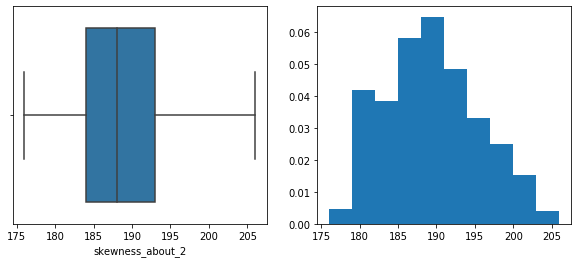

There are 0 outliers in the skewness_about_2 data

----------------------------------------hollows_ratio----------------------------------------

Maximum hollows_ratio : 211
Minimum hollows_ratio : 181
Average hollows_ratio : 195.63238770685578


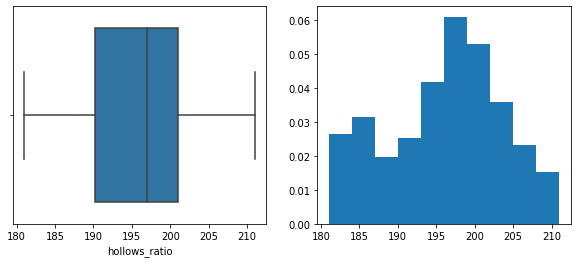

There are 0 outliers in the hollows_ratio data


In [184]:
for name in vehicle_data.drop('class',axis=1).columns.tolist():
    print('\n----------------------------------------{}----------------------------------------\n'.format(name))
    print('Maximum {} : {}'.format(name,vehicle_data[name].max()))
    print('Minimum {} : {}'.format(name,vehicle_data[name].min()))
    print('Average {} : {}'.format(name,vehicle_data[name].mean()))
    Q3=vehicle_data[name].quantile(q=0.75)
    Q1=vehicle_data[name].quantile(q=0.25)
    IQR=Q3-Q1
    ol=np.count_nonzero(vehicle_data[name]<(Q1-1.5*IQR)) + np.count_nonzero(vehicle_data[name]>(Q3+1.5*IQR))
    fig = plt.figure(figsize=(10, 4))
    ax1 = fig.add_subplot(121)
    sns.boxplot(vehicle_data[name])
    ax2 = fig.add_subplot(122)
    plt.hist(vehicle_data[name],density=True)
    plt.show()
    print('There are {} outliers in the {} data'.format(ol,name))

    

1.	Compactness data vary from 73 to 1109 with average value around 93. 
    There are no outliers and data is slightly left skewed

2.	Circularity data vary from 33 to 59 with average value around 44. 
    There are no outliers and data is slightly left skewed. Column has missing data.

3.	Distance_Circularity data vary from 40 to 112 with average value around 82.
    There are no outliers. Column has missing data.

4.	Radius_Ratio data vary from 104 to 33 with average value around 168.
    There are few outliers and data is left skewed. Column has missing data.

5.	Pr_Axis_Aspect_Ratio data vary from 47 and 138 with average value around 61.
    There are few outliers and data is left skewed. Column has missing data.

6.	Max_Length_Aspect_Ratio data vary from 2 to 55 with average value around 8.
    There are few outliers and data is left skewed. Only few records have value higher than 12.

7.	Scatter_Ratio data varies from 112 to 265 with average value around 168.
    There are no outliers and data is left skewed. Column has missing data.

8.	Elongatedness data varies from 26 to 61 with average value around 40.
    There are no outliers. Column has missing data.

9.	Pr_Axis_Rectangularity data varies from 17 to 29 with average value around 20.
    There are no outliers and data is left skewed. Column has missing data.

10.	Max_Length_Rectangularity data varies from 118 to 188 with average value around 147. 
    There are no outliers and data is  slightly left skewed. 

11.	scaled_variance data varies from 130 to 320 with average value around 188. 
    There are few outliers and data is slightly left skewed. Column has missing data.

12.	scaled_variance_1 data varies from 184 to 1018 with average value around 439. 
    There are few outliers and data is left skewed. Column has missing data.

13.	scaled_radius_of_gyration data varies from 109 to 268 with average value around 174. 
    There are no outliers. Column has missing data.

14.	scaled_radius_of_gyration_1 data varies from 59 to 135 with average value around 72. 
    There are many outliers and data is left skewed. Column has missing data.

15.	skewness_about data varies from 0 to 22 with average value around 6. 
    There are few outliers and data is slightly left skewed. Column has missing data. 
    0 values need to validate whether it is valid.

16.	skewness_about_1 data varies from 0 to 41 with average value around 12. 
    There are few outliers and data is slightly left skewed. Column has missing data. 
    0 values need to validate whether it is valid.

17.	skewness_about_2 data varies from 176 to 206 with average value around 188. 
    There are no outliers. Column has missing data. 

18.	hollows_ratio data varies from 181 to 211 with average value around 195. There are no outliers.

Class Variable

In [200]:
vehicle_data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

There are 429 records with Car class , 218 of Bus class and 199 of Van class.
50.71% of data belong to Car class.
25.77% of data belong to Buss Class.
23.52% of data belong to Van Class

# Bi Variant Analysis

In [10]:
bd=vehicle_data.copy()

compactness vs class

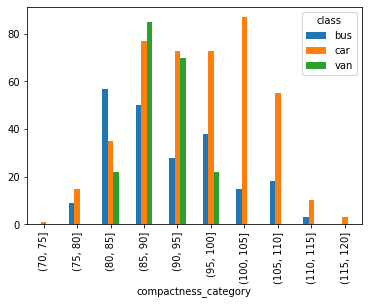

In [87]:
bd['compactness_category']=pd.cut(x=bd['compactness'], bins=[70,75,80,85,90,95,100,105,110,115,120])
pd.pivot_table(bd, index=['compactness_category'],columns='class',values='compactness',aggfunc='count').plot(kind='bar')
plt.show()

For the Bus Category Compactness range from 75-115. There are more records with compactness range of 80-85 in the dataset for Bus Category.

For the Car Category Compactness range from 70-120. There are more records with compactness range of 100-105 in the dataset for Car Category.

For the Van Category Compactness range from 80-100. There are more records with compactness range of 85-90 in the dataset for Van Category.

Car Category has the highest compactness value.

circularity vs class

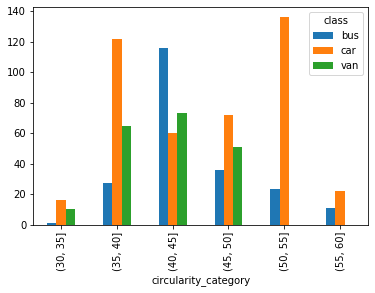

bus    4
car    1
Name: class, dtype: int64

In [149]:
bd['circularity_category']=pd.cut(x=bd['circularity'], bins=[30,35,40,45,50,55,60])
pd.pivot_table(bd, index=['circularity_category'],columns='class',values='circularity',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['circularity'].isna()==True]['class'].value_counts()

For the Bus Category Circularity range from 30-60. There are more records with Circularity range of 40-45 in the dataset for Bus Category.

For the Car Category Circularity range from 30-60. There are more records with Circularity range of 50-55 in the dataset for Car Category.

For the Van Category Circularity range from 30-50. There are more records with Circularity range of 40-45 in the dataset for Van Category.

Car & Bus Category has the highest circularity value.

There are 4 records in Bus Category and 1 in Car Category with Missing Value in circularity Column

distance_circularity vs Class

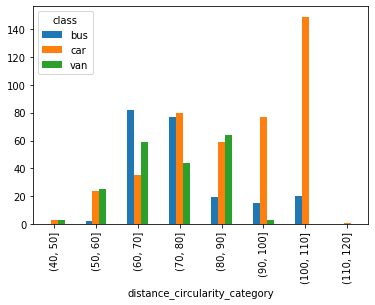

bus    3
van    1
Name: class, dtype: int64

In [150]:
bd['distance_circularity_category']=pd.cut(x=bd['distance_circularity'], bins=[40,50,60,70,80,90,100,110,120])
pd.pivot_table(bd, index=['distance_circularity_category'],columns='class',values='distance_circularity',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['distance_circularity'].isna()==True]['class'].value_counts()

For the Bus Category Distance Circularity range from 50-110. There are more records with Distance Circularity range of 60-70 in the dataset for Bus Category.

For the Car Category Distance Circularity range from 40-120. There are more records with Distance Circularity range of 100-110 in the dataset for Car Category.

For the Van Category Distance Circularity range from 40-100. There are more records with Distance Circularity range of 80-90 in the dataset for Van Category.

Car Category has the highest distance circularity value.

There are 3 records in Bus Category and 1 in Van Category with Missing Value in distance_circularity Column

In [ ]:
radius_ratio vs Class

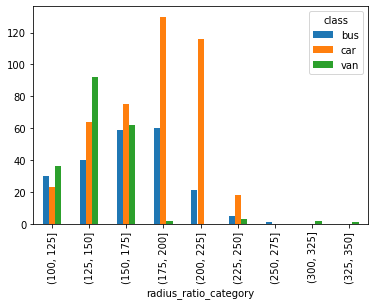

Outliers Count: 
van    3
Name: class, dtype: int64


In [181]:
bd['radius_ratio_category']=pd.cut(x=bd['radius_ratio'], bins=[100,125,150,175,200,225,250,275,300,325,350])
pd.pivot_table(bd, index=['radius_ratio_category'],columns='class',values='radius_ratio',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['radius_ratio'].isna()==True]['class'].value_counts()
Q3=bd['radius_ratio'].quantile(q=0.75)
Q1=bd['radius_ratio'].quantile(q=0.25)
IQR=Q3-Q1
print('Outliers Count: ')
print(bd[bd['radius_ratio']>(Q3+1.5*IQR)]['class'].value_counts())

For the Bus Category Radius Ratio range from 100-250. There are more records with Radius Ratio range of 150-200 in the dataset for Bus Category.

For the Car Category Radius Ratio range from 100-250. There are more records with Radius Ratio range of 175-200 in the dataset for Car Category.

For the Van Category Radius Ratio range from 100-350. There are more records with Radius Ratio range of 125-150 in the dataset for Van Category.

Van & Bus Category has the highest Radius Ratio value.

There are 3 records in Car Category, 2 records in Bus Category and 1 in Van Category with Missing Value in radius_ratio Column.

There are 3 outliers in the Van Category in radius_ratio Column.

pr_axis_aspect_ratio vs Class

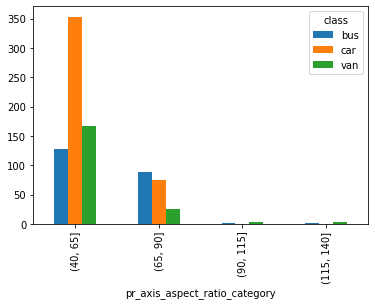

Outliers Count: 
van    6
bus    2
Name: class, dtype: int64


In [182]:
bd['pr_axis_aspect_ratio_category']=pd.cut(x=bd['pr_axis_aspect_ratio'], bins=[40,65,90,115,140])
pd.pivot_table(bd, index=['pr_axis_aspect_ratio_category'],columns='class',values='pr_axis_aspect_ratio',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['pr_axis_aspect_ratio'].isna()==True]['class'].value_counts()
Q3=bd['pr_axis_aspect_ratio'].quantile(q=0.75)
Q1=bd['pr_axis_aspect_ratio'].quantile(q=0.25)
IQR=Q3-Q1
print('Outliers Count: ')
print(bd[bd['pr_axis_aspect_ratio']>(Q3+1.5*IQR)]['class'].value_counts())

For the Bus Category Axis Aspect Ratio range from 40-140. There are more records with Axis Aspect Ratio range of 40-65 in the dataset for Bus Category.

For the Car Category Axis Aspect Ratio range from 40-90. There are more records with Axis Aspect Ratio range of 40-65 in the dataset for Car Category.

For the Van Category Axis Aspect Ratio range from 40-140. There are more records with Axis Aspect Ratio range of 40-65 in the dataset for Van Category.

Van & Bus Category has the highest axis_aspect_ratio value.

There are 1 record in Bus Category and 1 in Car Category with Missing Value in pr_axis_aspect_ratio Column

There are 6 outliers in the Van Category & 2 Outliers in Bus Category in pr_axis_aspect_ratio Column.

max_length_aspect_ratio vs Class

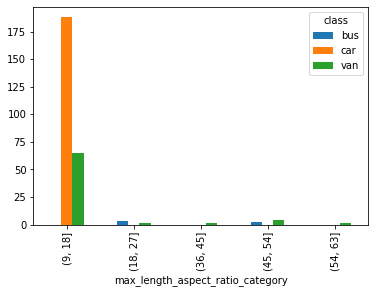

Outliers Count: 
van    7
bus    5
Name: class, dtype: int64
van    1
Name: class, dtype: int64


In [186]:
bd['max_length_aspect_ratio_category']=pd.cut(x=bd['max_length_aspect_ratio'], bins=[9,18,27,36,45,54,63])
pd.pivot_table(bd, index=['max_length_aspect_ratio_category'],columns='class',values='max_length_aspect_ratio',aggfunc='count').plot(kind='bar')
plt.show()
Q3=bd['max_length_aspect_ratio'].quantile(q=0.75)
Q1=bd['max_length_aspect_ratio'].quantile(q=0.25)
IQR=Q3-Q1
print('Outliers Count: ')
print(bd[bd['max_length_aspect_ratio']>(Q3+1.5*IQR)]['class'].value_counts())
print(bd[bd['max_length_aspect_ratio']<(Q1-1.5*IQR)]['class'].value_counts())

For the Bus Category Max Length Aspect Ratio range from 18-54. There are more records with Max Length Aspect Ratio range of 18-27 in the dataset for Bus Category.

For the Car Category Max Length Aspect Ratio range from 9-18. There are more records with Max Length Aspect Ratio range of 9-18 in the dataset for Car Category.

For the Van Category Max Length Aspect Ratio range from 9-63. There are more records with Max Length Aspect Ratio range of 9-18 in the dataset for Van Category.

Van Category has the highest max_length_aspect_ratio value.

There are 8 outliers in Van Category and 5 in Bus Category in max_length_aspect_ratio column.

scatter_ratio vs Class

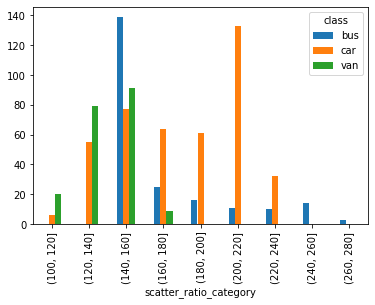

car    1
Name: class, dtype: int64

In [155]:
bd['scatter_ratio_category']=pd.cut(x=bd['scatter_ratio'], bins=[100,120,140,160,180,200,220,240,260,280])
pd.pivot_table(bd, index=['scatter_ratio_category'],columns='class',values='scatter_ratio',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['scatter_ratio'].isna()==True]['class'].value_counts()

For the Bus Category Scatter Ratio range from 140-280. There are more records with Scatter Ratio range of 140-160 in the dataset for Bus Category.

For the Car Category Scatter Ratio range from 100-240. There are more records with Scatter Ratio range of 200-220 in the dataset for Car Category.

For the Van Category Scatter Ratio range from 100-180. There are more records with Scatter Ratio range of 140-160 in the dataset for Van Category.

Bus Category has the highest scatter_ratio value.

There are 1 record in Car Category with Missing Value in scatter_ratio Column

In [ ]:
elongatedness vs Class

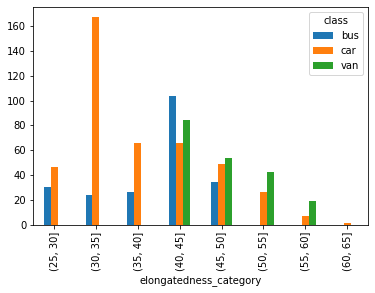

car    1
Name: class, dtype: int64

In [156]:
bd['elongatedness_category']=pd.cut(x=bd['elongatedness'], bins=[20,25,30,35,40,45,50,55,60,65])
pd.pivot_table(bd, index=['elongatedness_category'],columns='class',values='elongatedness',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['elongatedness'].isna()==True]['class'].value_counts()

For the Bus Category Elongatedness range from 25-50. There are more records with Elongatedness range of 40-45 in the dataset for Bus Category.

For the Car Category Elongatedness range from 25-65. There are more records with Elongatedness range of 30-35 in the dataset for Car Category.

For the Van Category Elongatedness range from 40-60. There are more records with Elongatedness range of 40-45 in the dataset for Van Category.

Car Category has the highest elongatedness value.

There are 1 record in Car Category with Missing Value in elongatedness Column

pr_axis_rectangularity vs Class

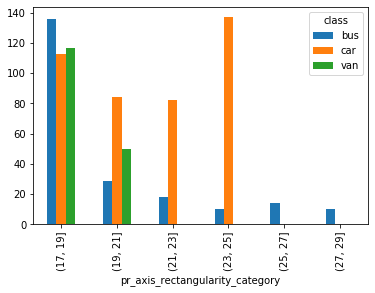

car    1
bus    1
van    1
Name: class, dtype: int64

In [157]:
bd['pr_axis_rectangularity_category']=pd.cut(x=bd['pr_axis_rectangularity'], bins=[17,19,21,23,25,27,29])
pd.pivot_table(bd, index=['pr_axis_rectangularity_category'],columns='class',values='pr_axis_rectangularity',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['pr_axis_rectangularity'].isna()==True]['class'].value_counts()

For the Bus Category pr_axis_rectangularity range from 17-29. There are more records with pr_axis_rectangularity range of 17-19 in the dataset for Bus Category.

For the Car Category pr_axis_rectangularity range from 17-25. There are more records with pr_axis_rectangularity range of 23-25 in the dataset for Car Category.

For the Van Category pr_axis_rectangularity range from 17-21. There are more records with pr_axis_rectangularity range of 17-19 in the dataset for Van Category.

Bus Category has the highest pr_axis_rectangularity value.

There are 1 record in Bus Category, 1 record in Van and 1 in Car Category with Missing Value in pr_axis_rectangularity Column

max_length_rectangularity vs Class

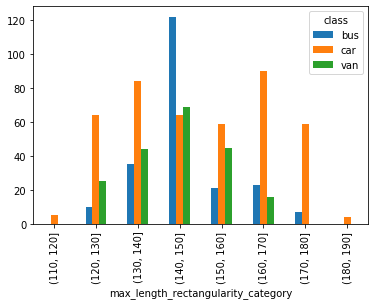

In [113]:
bd['max_length_rectangularity_category']=pd.cut(x=bd['max_length_rectangularity'], bins=[110,120,130,140,150,160,170,180,190])
pd.pivot_table(bd, index=['max_length_rectangularity_category'],columns='class',values='max_length_rectangularity',aggfunc='count').plot(kind='bar')
plt.show()

For the Bus Category max_length_rectangularity_category range from 120-180. There are more records with max_length_rectangularity_category range of 140-150 in the dataset for Bus Category.

For the Car Category max_length_rectangularity_category range from 110-190. There are more records with max_length_rectangularity_category range of 160-170 in the dataset for Car Category.

For the Van Category max_length_rectangularity_category range from 120-170. There are more records with max_length_rectangularity_category range of 140-150 in the dataset for Van Category.

Car Category has the highest max_length_rectangularity_category value.

scaled_variance vs Class

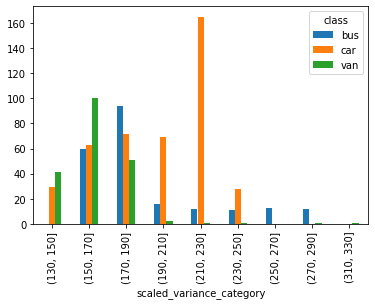

Outliers:


van    1
Name: class, dtype: int64

In [187]:
bd['scaled_variance_category']=pd.cut(x=bd['scaled_variance'], bins=[130,150,170,190,210,230,250,270,290,310,330])
pd.pivot_table(bd, index=['scaled_variance_category'],columns='class',values='scaled_variance',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['scaled_variance'].isna()==True]['class'].value_counts()
print('Outliers:')
Q3=bd['scaled_variance'].quantile(q=0.75)
Q1=bd['scaled_variance'].quantile(q=0.25)
IQR=Q3-Q1
bd[bd['scaled_variance']<(Q1-1.5*IQR)]['class'].value_counts()
bd[bd['scaled_variance']>(Q3+1.5*IQR)]['class'].value_counts()

For the Bus Category scaled_variance range from 150-290. There are more records with scaled_variance range of 170-190 in the dataset for Bus Category.

For the Car Category scaled_variance range from 130-250. There are more records with scaled_variance range of 210-230 in the dataset for Car Category.

For the Van Category scaled_variance range from 130-330. There are more records with scaled_variance range of 150-170 in the dataset for Van Category.

Van Category has the highest scaled_variance value.

There are 1 record in Van Category and 2 in Car Category with Missing Value in scaled_variance Column

There is 1 outlier in Van Category data in scaled_variance Column.

scaled_variance_1 vs Class

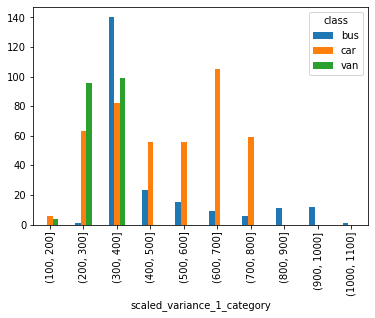

Outliers:


bus    2
Name: class, dtype: int64

In [188]:
bd['scaled_variance_1_category']=pd.cut(x=bd['scaled_variance_1'], bins=[100,200,300,400,500,600,700,800,900,1000,1100])
pd.pivot_table(bd, index=['scaled_variance_1_category'],columns='class',values='scaled_variance_1',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['scaled_variance_1'].isna()==True]['class'].value_counts()
print('Outliers:')
Q3=bd['scaled_variance_1'].quantile(q=0.75)
Q1=bd['scaled_variance_1'].quantile(q=0.25)
IQR=Q3-Q1
bd[bd['scaled_variance_1']<(Q1-1.5*IQR)]['class'].value_counts()
bd[bd['scaled_variance_1']>(Q3+1.5*IQR)]['class'].value_counts()

For the Bus Category scaled_variance_1 range from 200-1100. There are more records with scaled_variance_1 range of 300-400 in the dataset for Bus Category.

For the Car Category scaled_variance_1 range from 100-800. There are more records with scaled_variance_1 range of 600-700 in the dataset for Car Category.

For the Van Category scaled_variance_1 range from 130-330. There are more records with scaled_variance_1 range of 300-400 in the dataset for Van Category.

Bus Category has the highest scaled_variance_1 value.

There is 2 record in Bus Category with Missing Value in scaled_variance_1 Column

scaled_radius_of_gyration vs Class

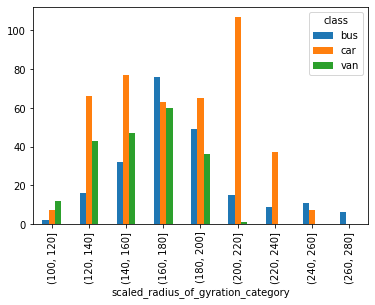

bus    2
Name: class, dtype: int64

In [161]:
bd['scaled_radius_of_gyration_category']=pd.cut(x=bd['scaled_radius_of_gyration'], bins=[100,120,140,160,180,200,220,240,260,280])
pd.pivot_table(bd, index=['scaled_radius_of_gyration_category'],columns='class',values='scaled_radius_of_gyration',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['scaled_radius_of_gyration'].isna()==True]['class'].value_counts()

For the Bus Category scaled_radius_of_gyration range from 100-280. There are more records with scaled_radius_of_gyration range of 160-180 in the dataset for Bus Category.

For the Car Category scaled_radius_of_gyration range from 100-260. There are more records with scaled_radius_of_gyration range of 200-220 in the dataset for Car Category.

For the Van Category scaled_radius_of_gyration range from 100-220 There are more records with scaled_radius_of_gyration range of 160-180 in the dataset for Van Category.

Bus Category has the highest scaled_radius_of_gyration value.

There are 2 record in Car Category with Missing Value in scaled_radius_of_gyration Column

scaled_radius_of_gyration_1 vs Class

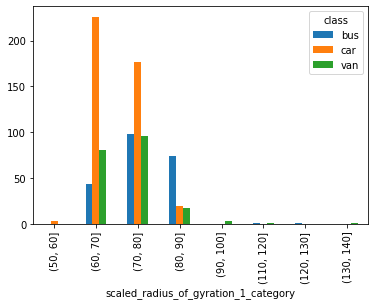

Outliers:


van    9
bus    6
Name: class, dtype: int64

In [189]:
bd['scaled_radius_of_gyration_1_category']=pd.cut(x=bd['scaled_radius_of_gyration_1'], bins=[50,60,70,80,90,100,110,120,130,140,150,160,170,180])
pd.pivot_table(bd, index=['scaled_radius_of_gyration_1_category'],columns='class',values='scaled_radius_of_gyration_1',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['scaled_radius_of_gyration_1'].isna()==True]['class'].value_counts()
print('Outliers:')
Q3=bd['scaled_radius_of_gyration_1'].quantile(q=0.75)
Q1=bd['scaled_radius_of_gyration_1'].quantile(q=0.25)
IQR=Q3-Q1
bd[bd['scaled_radius_of_gyration_1']<(Q1-1.5*IQR)]['class'].value_counts()
bd[bd['scaled_radius_of_gyration_1']>(Q3+1.5*IQR)]['class'].value_counts()

For the Bus Category scaled_radius_of_gyration_1 range from 60-130. There are more records with scaled_radius_of_gyration_1 range of 70-80 in the dataset for Bus Category.

For the Car Category scaled_radius_of_gyration_1 range from 50-90. There are more records with scaled_radius_of_gyration_1 range of 60-70 in the dataset for Car Category.

For the Van Category scaled_radius_of_gyration_1 range from 60-140 There are more records with scaled_radius_of_gyration_1 range of 70-80 in the dataset for Van Category.

Van Category has the highest scaled_radius_of_gyration_1 value.

There are 1 record in Bus Category and 3 in Car Category with Missing Value in scaled_radius_of_gyration_1 Column

There are 9 outliers in Van and 6 in Bus category in scaled_radius_of_gyration_1 Column

In [ ]:
skewness_about vs Class

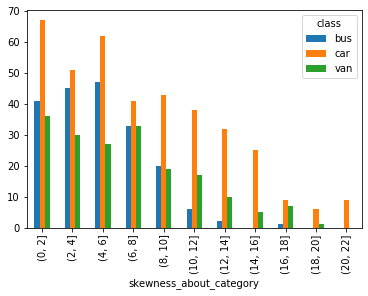

Outliers:


car    12
Name: class, dtype: int64

In [190]:
bd['skewness_about_category']=pd.cut(x=bd['skewness_about'], bins=[0,2,4,6,8,10,12,14,16,18,20,22])
pd.pivot_table(bd, index=['skewness_about_category'],columns='class',values='skewness_about',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['skewness_about'].isna()==True]['class'].value_counts()
print('Outliers:')
Q3=bd['skewness_about'].quantile(q=0.75)
Q1=bd['skewness_about'].quantile(q=0.25)
IQR=Q3-Q1
bd[bd['skewness_about']<(Q1-1.5*IQR)]['class'].value_counts()
bd[bd['skewness_about']>(Q3+1.5*IQR)]['class'].value_counts()

For the Bus Category skewness_about range from 0-18. There are more records with skewness_about range of 4-6 in the dataset for Bus Category.

For the Car Category skewness_about range from 0-22. There are more records with skewness_about range of 0-2 in the dataset for Car Category.

For the Van Category skewness_about range from 0-20 There are more records with skewness_about range of 0-2 in the dataset for Van Category.

Car Category has the highest skewness_about value.

There are 4 record in Bus Category and 2 in Car Category with Missing Value in skewness_about Column

There are 12 outliers of Car Category in skewness_about Column

skewness_about_1 vs class

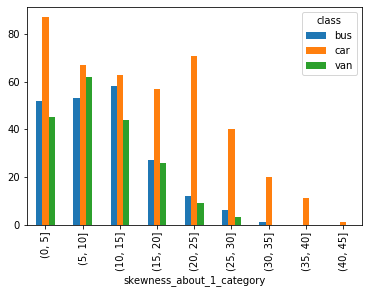

Outliers:


car    1
Name: class, dtype: int64

In [191]:
bd['skewness_about_1_category']=pd.cut(x=bd['skewness_about_1'], bins=[0,5,10,15,20,25,30,35,40,45])
pd.pivot_table(bd, index=['skewness_about_1_category'],columns='class',values='skewness_about_1',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['skewness_about_1'].isna()==True]['class'].value_counts()
print('Outliers:')
Q3=bd['skewness_about_1'].quantile(q=0.75)
Q1=bd['skewness_about_1'].quantile(q=0.25)
IQR=Q3-Q1
bd[bd['skewness_about_1']<(Q1-1.5*IQR)]['class'].value_counts()
bd[bd['skewness_about_1']>(Q3+1.5*IQR)]['class'].value_counts()

For the Bus Category skewness_about_1 range from 0-35. There are more records with skewness_about_1 range of 10-15 in the dataset for Bus Category.

For the Car Category skewness_about_1 range from 0-45. There are more records with skewness_about_1 range of 0-5 in the dataset for Car Category.

For the Van Category skewness_about_1 range from 0-30 There are more records with skewness_about_1 range of 5-10 in the dataset for Van Category.

Car Category has the highest skewness_about_1 value.

There is 1 record in Car category with missing value in skewness_about_1 column

There is 1 outlier of Car Category in skewness_about_1 column

skewness_about_2 vs class

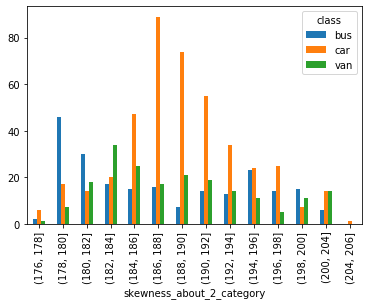

car    1
Name: class, dtype: int64

In [165]:
bd['skewness_about_2_category']=pd.cut(x=bd['skewness_about_2'], bins=[176,178,180,182,184,186,188,190,192,194,196,198,200,204,206])
pd.pivot_table(bd, index=['skewness_about_2_category'],columns='class',values='skewness_about_2',aggfunc='count').plot(kind='bar')
plt.show()
bd[bd['skewness_about_2'].isna()==True]['class'].value_counts()

For the Bus Category skewness_about_2 range from 176-204. There are more records with skewness_about_2 range of 178-180 in the dataset for Bus Category.

For the Car Category skewness_about_2 range from 176-206. There are more records with skewness_about_2 range of 176-206 in the dataset for Car Category.

For the Van Category skewness_about_2 range from 176-204 There are more records with skewness_about_2 range of 182-184 in the dataset for Van Category.

Car Category has the highest skewness_about_2 value.

There is 1 record in Car category with missing value in skewness_about_2 column

hollows_ratio vs class

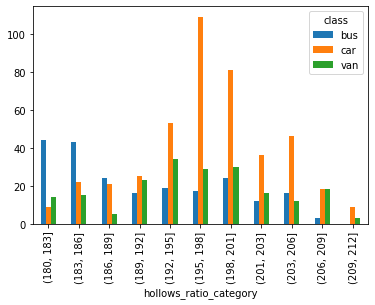

In [125]:
bd['hollows_ratio_category']=pd.cut(x=bd['hollows_ratio'], bins=[180,183,186,189,192,195,198,201,203,206,209,212])
pd.pivot_table(bd, index=['hollows_ratio_category'],columns='class',values='hollows_ratio',aggfunc='count').plot(kind='bar')
plt.show()

For the Bus Category hollows_ratio range from 180-209. There are more records with hollows_ratio range of 180-183 in the dataset for Bus Category.

For the Car Category hollows_ratio range from 180-212. There are more records with hollows_ratio range of 195-198 in the dataset for Car Category.

For the Van Category hollows_ratio range from 180-212 There are more records with hollows_ratio range of 192-195 in the dataset for Van Category.

Car & Van Category has the highest hollows_ratio value.

Conclusion:

The missing value needs to be replaced with mean values of respective Class.

Data needs to be scaled as the values range in wide range.

Upon observation there are no patterns in the Outliers data hence it can be treated by replacing the median value of the Class Data.
    
Records with value 0 needs to be analyzed for validity. 
    Skewness column indicates 3rd order moment about major axis)/sigma_min**3 MAJOR AXIS/MINOR AXIS.
    Hence it looks like a valid 0 value.


In [ ]:
Multivariate Analysis

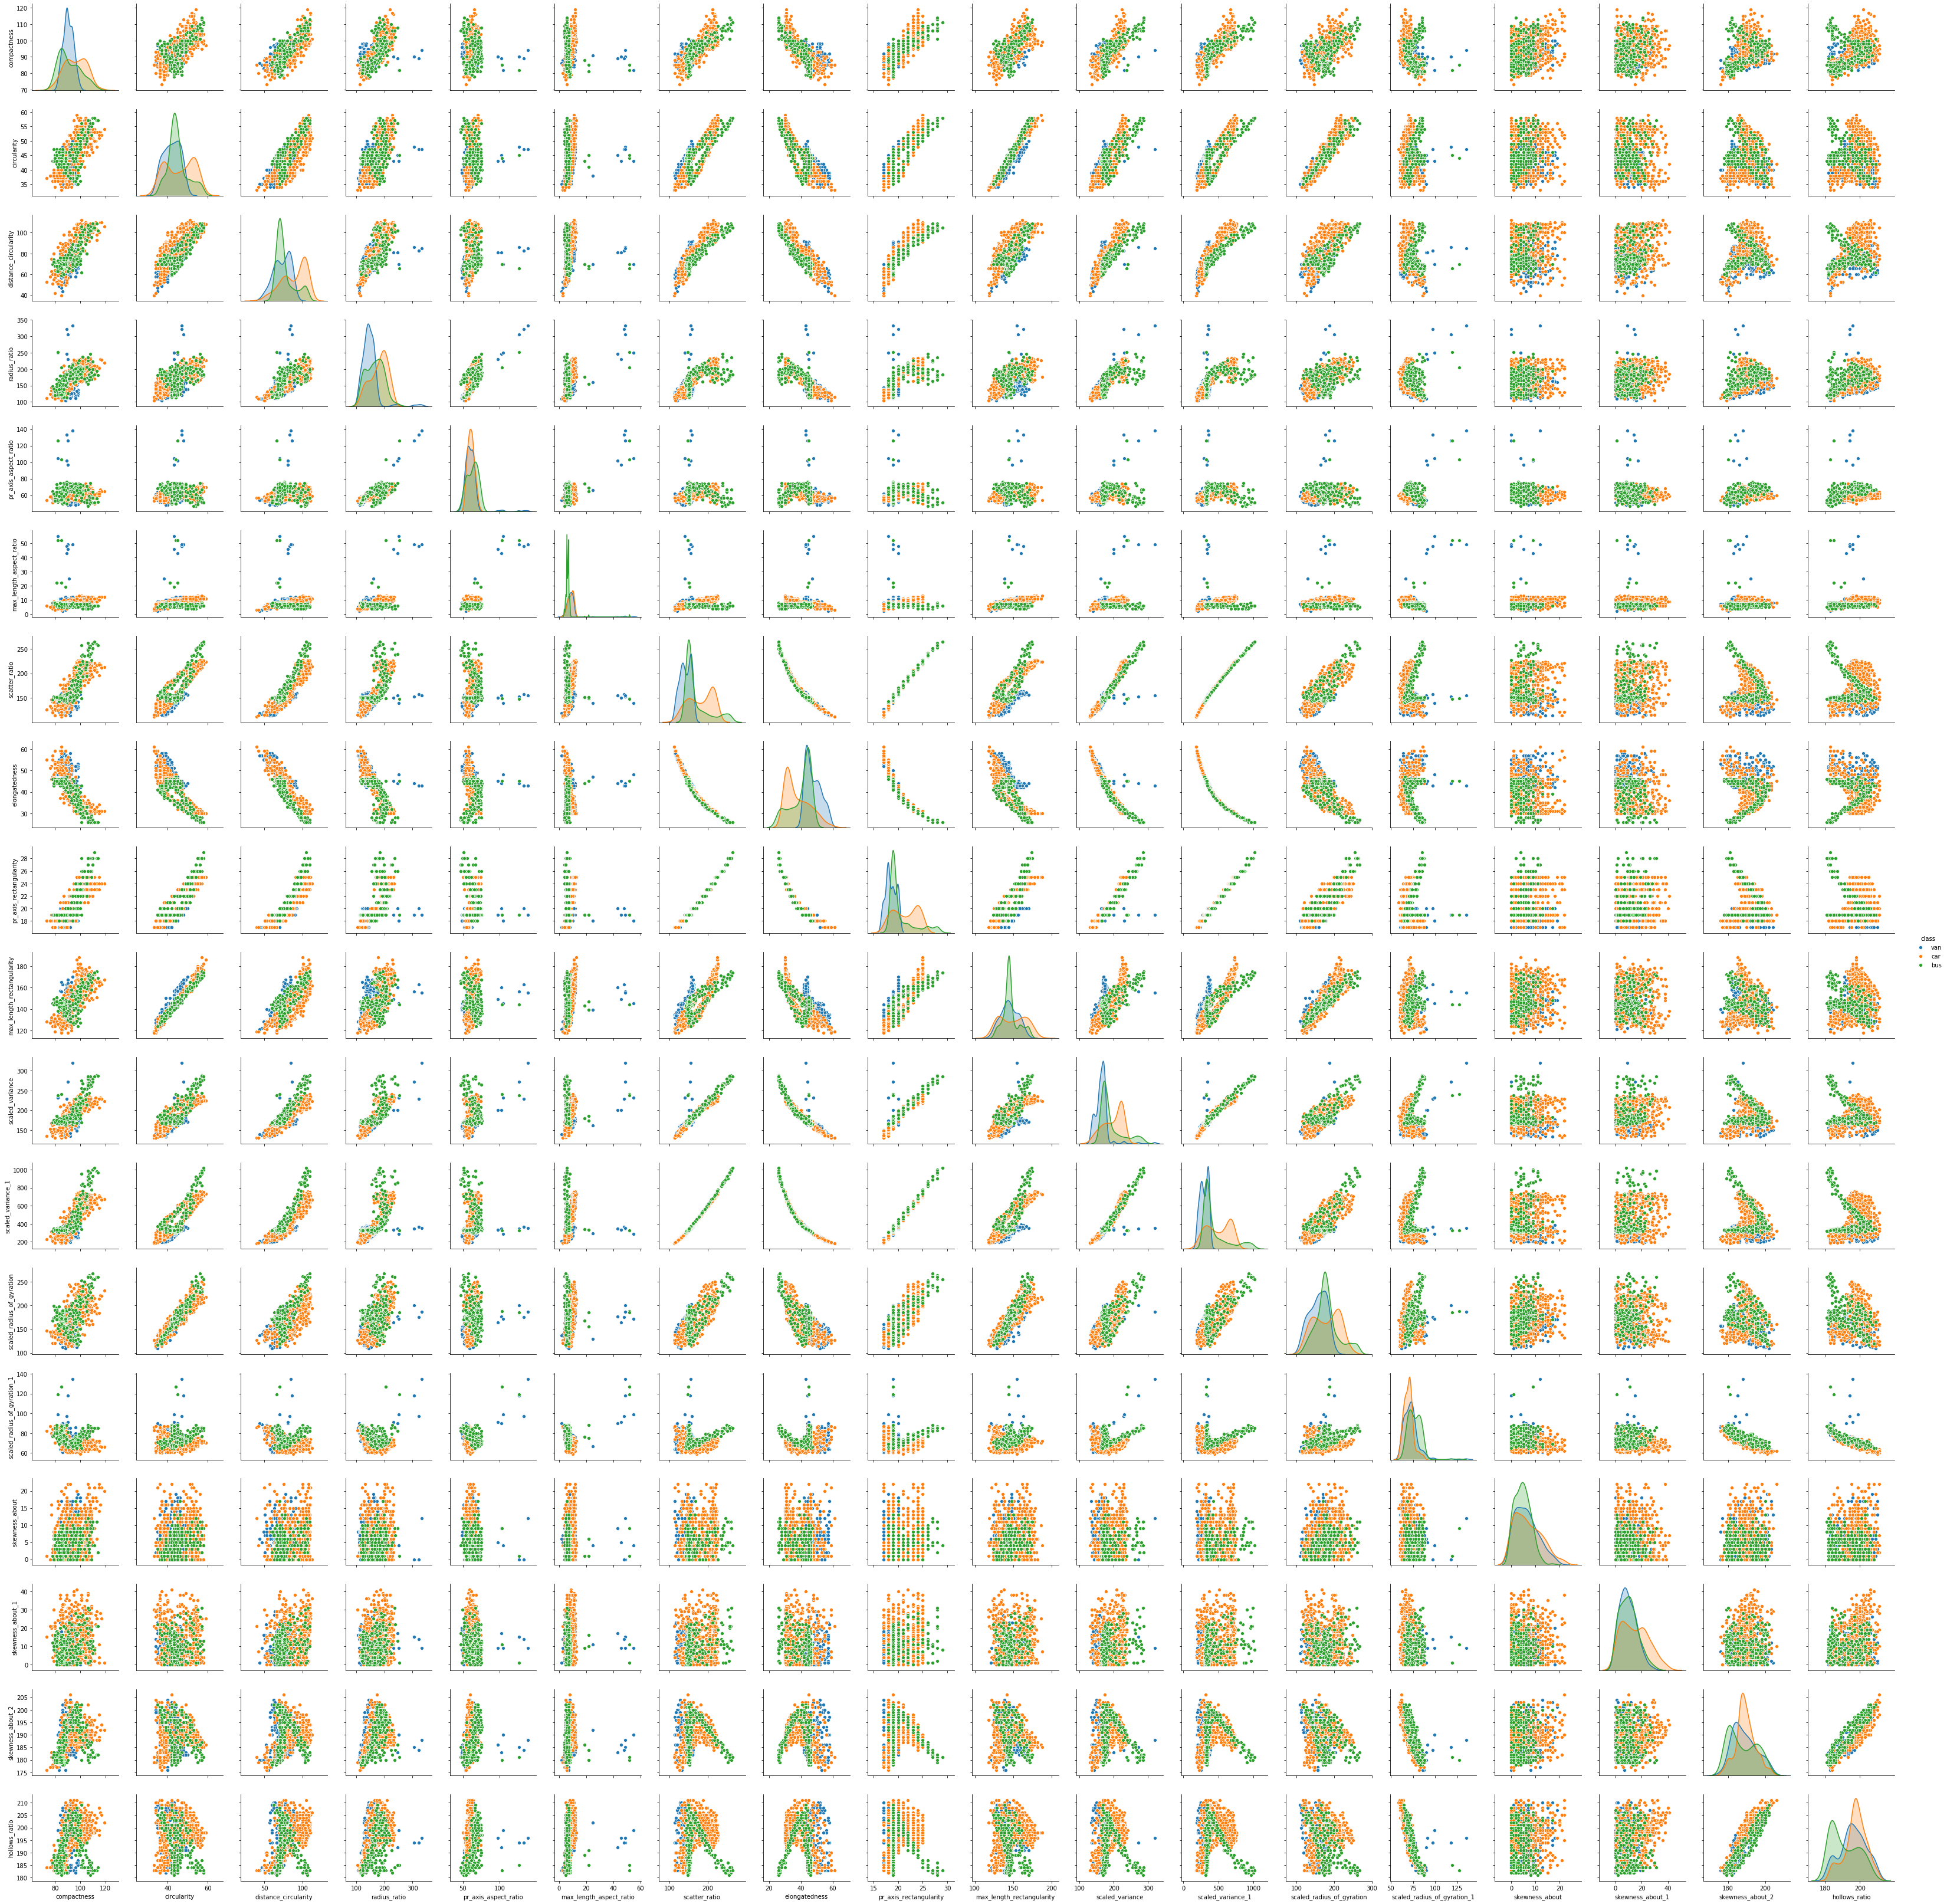

In [193]:
sns.pairplot(vehicle_data,hue='class')
plt.show()

In [198]:
cd=vehicle_data.copy()
cd['class'].replace({"car": 1, "bus": 2,"van":3},inplace=True)
cd.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689786              0.791707   
circularity                     0.689786     1.000000              0.797180   
distance_circularity            0.791707     0.797180              1.000000   
radius_ratio                    0.691081     0.625051              0.771748   
pr_axis_aspect_ratio            0.091779     0.154283              0.158684   
max_length_aspect_ratio         0.148249     0.251407              0.264621   
scatter_ratio                   0.812770     0.858265              0.907949   
elongatedness                  -0.788736    -0.827246             -0.913020   
pr_axis_rectangularity          0.814248     0.856603              0.896273   
max_length_rectangularity       0.676143     0.965729              0.775149   
scaled_variance                 0.764361     0.806791              0.865710   
scaled_variance_1               0.818674     0.850863              0.890541   
scaled_radius_of_gyration       0.585845     0.935950              0.706950   
scaled_radius_of_gyration_1    -0.250603     0.053080             -0.227001   
skewness_about                  0.236685     0.144968              0.114665   
skewness_about_1                0.157670    -0.011869              0.266049   
skewness_about_2                0.298528    -0.106339              0.146027   
hollows_ratio                   0.365552     0.045652              0.333648   
class                          -0.297774    -0.251408             -0.428836   

                             radius_ratio  pr_axis_aspect_ratio  \
compactness                      0.691081              0.091779   
circularity                      0.625051              0.154283   
distance_circularity             0.771748              0.158684   
radius_ratio                     1.000000              0.665363   
pr_axis_aspect_ratio             0.665363              1.000000   
max_length_aspect_ratio          0.450486              0.648861   
scatter_ratio                    0.738480              0.103832   
elongatedness                   -0.792946             -0.183492   
pr_axis_rectangularity           0.712744              0.079566   
max_length_rectangularity        0.571083              0.127322   
scaled_variance                  0.798294              0.273738   
scaled_variance_1                0.725598              0.089750   
scaled_radius_of_gyration        0.541325              0.122454   
scaled_radius_of_gyration_1     -0.181520              0.152860   
skewness_about                   0.049112             -0.058539   
skewness_about_1                 0.174469             -0.032180   
skewness_about_2                 0.382912              0.240201   
hollows_ratio                    0.472339              0.267760   
class                           -0.403329              0.038650   

                             max_length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812770   
circularity                                 0.251407       0.858265   
distance_circularity                        0.264621       0.907949   
radius_ratio                                0.450486       0.738480   
pr_axis_aspect_ratio                        0.648861       0.103832   
max_length_aspect_ratio                     1.000000       0.165998   
scatter_ratio                               0.165998       1.000000   
elongatedness                              -0.180053      -0.973504   
pr_axis_rectangularity                      0.161603       0.992078   
max_length_rectangularity                   0.305943       0.810017   
scaled_variance                             0.319033       0.951672   
scaled_variance_1                           0.143745       0.996328   
scaled_radius_of_gyration                   0.189752       0.800577   
scaled_radius_of_gyration_1                 0.295638      -0.028006   
skewness_about                            

Compactness is highly correlated with the columns max_length_rectangularity,scaled_variance_1,pr_axis_rectangularity,elongatedness,distance_circularity,radius_ratio,scatter_ratio,circularity

Circularity is highly corelated with the columns distance_circularity,radius_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration.

distance_circularity is highly corelated with the columns radius_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration

radius_ratio is highly corelated with the columns pr_axis_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,scaled_variance,scaled_variance_1

pr_axis_aspect_ratio is highly correlated with the column max_length_aspect_ratio

scatter_ratio is highly correlated with the columns elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_radius_of_gyration.

elongatedness is highly correlated with the columns pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration

pr_axis_rectangularity is highly correlated with max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration

max_length_rectangularity is highly corelated with scaled_variance,scaled_variance_1,scaled_radius_of_gyration

scaled_variance is highly corelated with scaled_variance_1,scaled_radius_of_gyration

scaled_variance_1 is highly corelated with scaled_radius_of_gyration

skewness_about_2 is highly corelated with hollows_ratio

Target varaiable has not much correlation with other attributes.



# Preparing the data

Handling missing Data

All the NaN are replaced with the mean of respective class.

In [4]:
nv=pd.DataFrame(vehicle_data.isna().sum())
nv['columns']=vehicle_data.columns.tolist()
for i in range(0,19):
    if (nv[0][i]>0):
        vehicle_data[nv['columns'][i]].fillna(vehicle_data[vehicle_data['class']=='bus'][nv['columns'][i]].mean(),inplace=True)
        vehicle_data[nv['columns'][i]].fillna(vehicle_data[vehicle_data['class']=='car'][nv['columns'][i]].mean(),inplace=True)
        vehicle_data[nv['columns'][i]].fillna(vehicle_data[vehicle_data['class']=='van'][nv['columns'][i]].mean(),inplace=True)

In [5]:
vehicle_data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr_axis_aspect_ratio           0
max_length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr_axis_rectangularity         0
max_length_rectangularity      0
scaled_variance                0
scaled_variance_1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration_1    0
skewness_about                 0
skewness_about_1               0
skewness_about_2               0
hollows_ratio                  0
class                          0
dtype: int64

Outliners Handling

In [5]:
vehicle_data_nout=vehicle_data.copy() # Dataset with Outliners dropped.
vehicle_data_repout=vehicle_data.copy() #Dataset with Outliners Replaced.

In [6]:
QS3=vehicle_data_repout['skewness_about'].quantile(q=0.75)
QS1=vehicle_data_repout['skewness_about'].quantile(q=0.25)
IQRS=QS3-QS1
oS1=(QS3+1.5*IQRS)
oS2=(QS1-1.5*IQRS)
vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['skewness_about'] >oS1 ].index , inplace=True)
vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['skewness_about'] <oS2 ].index , inplace=True)
vehicle_data_repout['skewness_about']=np.where(((vehicle_data_repout['class']=='car') & (vehicle_data_repout['skewness_about'] >oS1)),vehicle_data_repout[(vehicle_data_repout['class']=='car') ]['skewness_about'].mean(),vehicle_data_repout.skewness_about)
vehicle_data_repout['skewness_about']=np.where(((vehicle_data_repout['class']=='car') & (vehicle_data_repout['skewness_about'] <oS2)),vehicle_data_repout[(vehicle_data_repout['class']=='car') ]['skewness_about'].mean(),vehicle_data_repout.skewness_about)

In [7]:
QG3=vehicle_data_repout['scaled_radius_of_gyration_1'].quantile(q=0.75)
QG1=vehicle_data_repout['scaled_radius_of_gyration_1'].quantile(q=0.25)
IQRG=QG3-QG1
oG1=(QG3+1.5*IQRG)
oG2=(QG1-1.5*IQRG)
vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['scaled_radius_of_gyration_1'] >oG1 ].index , inplace=True)
vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['scaled_radius_of_gyration_1'] <oG2 ].index , inplace=True)
vehicle_data_repout['scaled_radius_of_gyration_1']=np.where(((vehicle_data_repout['class']=='bus') & (vehicle_data_repout['scaled_radius_of_gyration_1'] >oG1)),vehicle_data_repout[(vehicle_data_repout['class']=='bus') ]['scaled_radius_of_gyration_1'].mean(),vehicle_data_repout.scaled_radius_of_gyration_1)
vehicle_data_repout['scaled_radius_of_gyration_1']=np.where(((vehicle_data_repout['class']=='bus') & (vehicle_data_repout['scaled_radius_of_gyration_1'] <oG2)),vehicle_data_repout[(vehicle_data_repout['class']=='bus') ]['scaled_radius_of_gyration_1'].mean(),vehicle_data_repout.scaled_radius_of_gyration_1)
vehicle_data_repout['scaled_radius_of_gyration_1']=np.where(((vehicle_data_repout['class']=='van') & (vehicle_data_repout['scaled_radius_of_gyration_1'] >oG1)),vehicle_data_repout[(vehicle_data_repout['class']=='van') ]['scaled_radius_of_gyration_1'].mean(),vehicle_data_repout.scaled_radius_of_gyration_1)
vehicle_data_repout['scaled_radius_of_gyration_1']=np.where(((vehicle_data_repout['class']=='van') & (vehicle_data_repout['scaled_radius_of_gyration_1'] <oG2)),vehicle_data_repout[(vehicle_data_repout['class']=='van') ]['scaled_radius_of_gyration_1'].mean(),vehicle_data_repout.scaled_radius_of_gyration_1)

In [8]:
Q3=vehicle_data_repout['radius_ratio'].quantile(q=0.75)
Q1=vehicle_data_repout['radius_ratio'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)
vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['radius_ratio'] >o1 ].index , inplace=True)
vehicle_data_repout['radius_ratio']=np.where(((vehicle_data_repout['class']=='van') & (vehicle_data_repout['radius_ratio'] >o1)),vehicle_data_repout[(vehicle_data_repout['class']=='van') ]['radius_ratio'].mean(),vehicle_data_repout.radius_ratio)

In [9]:
Q3=vehicle_data_repout['pr_axis_aspect_ratio'].quantile(q=0.75)
Q1=vehicle_data_repout['pr_axis_aspect_ratio'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)
vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['pr_axis_aspect_ratio'] >o1 ].index , inplace=True)
vehicle_data_repout['pr_axis_aspect_ratio']=np.where(((vehicle_data_repout['class']=='van') & (vehicle_data_repout['pr_axis_aspect_ratio'] >o1)),vehicle_data_repout[(vehicle_data_repout['class']=='van') ]['pr_axis_aspect_ratio'].mean(),vehicle_data_repout.pr_axis_aspect_ratio)
vehicle_data_repout['pr_axis_aspect_ratio']=np.where(((vehicle_data_repout['class']=='bus') & (vehicle_data_repout['pr_axis_aspect_ratio'] >o1)),vehicle_data_repout[(vehicle_data_repout['class']=='bus') ]['pr_axis_aspect_ratio'].mean(),vehicle_data_repout.pr_axis_aspect_ratio)

In [10]:
Q3=vehicle_data_repout['max_length_aspect_ratio'].quantile(q=0.75)
Q1=vehicle_data_repout['max_length_aspect_ratio'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)
vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['max_length_aspect_ratio'] >o1 ].index , inplace=True)
vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['max_length_aspect_ratio'] <o2 ].index , inplace=True)
vehicle_data_repout['max_length_aspect_ratio']=np.where(((vehicle_data_repout['class']=='van') & (vehicle_data_repout['max_length_aspect_ratio'] >o1)),vehicle_data_repout[(vehicle_data_repout['class']=='van') ]['max_length_aspect_ratio'].mean(),vehicle_data_repout.max_length_aspect_ratio)
vehicle_data_repout['max_length_aspect_ratio']=np.where(((vehicle_data_repout['class']=='van') & (vehicle_data_repout['max_length_aspect_ratio'] <o2)),vehicle_data_repout[(vehicle_data_repout['class']=='van') ]['max_length_aspect_ratio'].mean(),vehicle_data_repout.max_length_aspect_ratio)
vehicle_data_repout['max_length_aspect_ratio']=np.where(((vehicle_data_repout['class']=='bus') & (vehicle_data_repout['max_length_aspect_ratio'] >o1)),vehicle_data_repout[(vehicle_data_repout['class']=='bus') ]['max_length_aspect_ratio'].mean(),vehicle_data_repout.max_length_aspect_ratio)

In [11]:
Q3=vehicle_data_repout['scaled_variance'].quantile(q=0.75)
Q1=vehicle_data_repout['scaled_variance'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)
vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['scaled_variance'] >o1 ].index , inplace=True)
vehicle_data_repout['scaled_variance']=np.where(((vehicle_data_repout['class']=='van') & (vehicle_data_repout['scaled_variance'] >o1)),vehicle_data_repout[(vehicle_data_repout['class']=='van') ]['scaled_variance'].mean(),vehicle_data_repout.scaled_variance)

In [12]:
Q3=vehicle_data_repout['skewness_about_1'].quantile(q=0.75)
Q1=vehicle_data_repout['skewness_about_1'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)
vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['skewness_about_1'] >o1 ].index , inplace=True)
vehicle_data_repout['skewness_about_1']=np.where(((vehicle_data_repout['class']=='car') & (vehicle_data_repout['skewness_about_1'] >o1)),vehicle_data_repout[(vehicle_data_repout['class']=='car') ]['skewness_about_1'].mean(),vehicle_data_repout.skewness_about_1)

In [13]:
Q3=vehicle_data_repout['scaled_variance_1'].quantile(q=0.75)
Q1=vehicle_data_repout['scaled_variance_1'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)

vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['scaled_variance_1'] >o1 ].index , inplace=True)

vehicle_data_nout.drop( vehicle_data_nout[ vehicle_data_nout['scaled_variance_1'] <o2 ].index , inplace=True)

vehicle_data_repout['scaled_variance_1']=np.where(((vehicle_data_repout['class']=='bus') & (vehicle_data_repout['scaled_variance_1'] >o1)),vehicle_data_repout[(vehicle_data_repout['class']=='bus') ]['scaled_variance_1'].mean(),vehicle_data_repout.scaled_variance_1)
vehicle_data_repout['scaled_variance_1']=np.where(((vehicle_data_repout['class']=='bus') & (vehicle_data_repout['scaled_variance_1'] <o2)),vehicle_data_repout[(vehicle_data_repout['class']=='bus') ]['scaled_variance_1'].mean(),vehicle_data_repout.scaled_variance_1)

#Standardizing the data with Z score & Standard Scalar

In [129]:
X_scaled_nout=vehicle_data_nout.drop('class',axis=1)
X_scaled_nout=X_scaled_nout.apply(zscore)
Y_scaled_nout=vehicle_data_nout['class']

X_scaled_repout=vehicle_data_repout.drop('class',axis=1)
X_scaled_repout=X_scaled_repout.apply(zscore)
Y_scaled_repout=vehicle_data_repout['class']

X_scaled_original=vehicle_data.drop('class',axis=1)
X_scaled_original=X_scaled_original.apply(zscore)
Y_scaled_original=vehicle_data['class']

X_original=vehicle_data.drop('class',axis=1)
Y_original=vehicle_data['class']

In [130]:
# Scaling all independent variable except the X_original 
sc = StandardScaler()
X_scaled_nout = sc.fit_transform(X_scaled_nout)
X_scaled_repout = sc.fit_transform(X_scaled_repout)
X_scaled_original = sc.fit_transform(X_scaled_original)

In [16]:
#SVM for Dataset with Outliners dropped

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_nout,Y_scaled_nout,test_size=0.30, random_state=1)
svc_nout = SVC()
svc_nout.fit(X_train, y_train)
print("Accuracy on training set with Outliners dropped: {:.2f}".format(svc_nout.score(X_train, y_train)*100))
print("Accuracy on test set with Outliners dropped: {:.2f}".format(svc_nout.score(X_test, y_test)*100))

y_predict_train = svc_nout.predict(X_train)
y_predict_test = svc_nout.predict(X_test)

accuracy_score_train=metrics.accuracy_score(y_train,y_predict_train)
accuracy_score_test=metrics.accuracy_score(y_test,y_predict_test)

model_score_nout = svc_nout.score(X_test, y_test)

print("SVM Model Score for Dataset with Outliners dropped : {} \n".format(model_score_nout*100))



Accuracy on training set with Outliners dropped: 98.08
Accuracy on test set with Outliners dropped: 97.56
SVM Model Score for Dataset with Outliners dropped : 97.5609756097561 



In [ ]:
#SVM for Dataset with Outliners changes to mean value 

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_repout,Y_scaled_repout,test_size=0.30, random_state=1)
svc_repout = SVC()
svc_repout.fit(X_train, y_train)
print("Accuracy on training set with Outliners replaced with mean: {:.2f}".format(svc_repout.score(X_train, y_train)*100))
print("Accuracy on test set with Outliners replaced with mean: {:.2f}".format(svc_repout.score(X_test, y_test)*100))

y_predict_train = svc_repout.predict(X_train)
y_predict_test = svc_repout.predict(X_test)

accuracy_score_train=metrics.accuracy_score(y_train,y_predict_train)
accuracy_score_test=metrics.accuracy_score(y_test,y_predict_test)

model_score_repout = svc_repout.score(X_test, y_test)

print("SVM Model Score for Dataset with Outliners replaced with mean : {} \n".format(model_score_repout*100))

Accuracy on training set with Outliners replaced with mean: 97.13
Accuracy on test set with Outliners replaced with mean: 95.67
SVM Model Score for Dataset with Outliners replaced with mean : 95.66929133858267 



In [ ]:
#SVM for Dataset with Original Scaled Value

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_original,Y_scaled_original,test_size=0.30, random_state=1)
svc_scal_orig = SVC()
svc_scal_orig.fit(X_train, y_train)
print("Accuracy on training set with Original Scaled data: {:.2f}".format(svc_scal_orig.score(X_train, y_train)*100))
print("Accuracy on test set with Original Scaled data: {:.2f}".format(svc_scal_orig.score(X_test, y_test)*100))

y_predict_train = svc_repout.predict(X_train)
y_predict_test = svc_repout.predict(X_test)

accuracy_score_train=metrics.accuracy_score(y_train,y_predict_train)
accuracy_score_test=metrics.accuracy_score(y_test,y_predict_test)

model_score_scal_orig = svc_scal_orig.score(X_test, y_test)

print("SVM Model Score for Dataset with Original Scaled data : {} \n".format(model_score_scal_orig*100))

Accuracy on training set with Original Scaled data: 96.62
Accuracy on test set with Original Scaled data: 94.88
SVM Model Score for Dataset with Original Scaled data : 94.88188976377953 



In [ ]:
#SVM for Dataset with Original data

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_original,Y_original,test_size=0.30, random_state=1)
svc_orig = SVC()
svc_orig.fit(X_train, y_train)
print("Accuracy on training set with Original data: {:.2f}".format(svc_orig.score(X_train, y_train)*100))
print("Accuracy on test set with Original data: {:.2f}".format(svc_orig.score(X_test, y_test)*100))

y_predict_train = svc_orig.predict(X_train)
y_predict_test = svc_orig.predict(X_test)

accuracy_score_train=metrics.accuracy_score(y_train,y_predict_train)
accuracy_score_test=metrics.accuracy_score(y_test,y_predict_test)

model_score_svc_orig= svc_orig.score(X_test, y_test)

print("SVM Model Score for Dataset with Original data : {} \n".format(model_score_svc_orig*100))

Accuracy on training set with Original data: 100.00
Accuracy on test set with Original data: 52.76
SVM Model Score for Dataset with Original data : 52.75590551181102 



Conclusion: Model performance on orginal Non Scaled data is a overfit and has bad performance on test data

In [ ]:
# K fold Validtion on Dataset with Outliners dropped

In [169]:
kfold = KFold(n_splits=20, random_state=1)
model = SVC()
results_nout = cross_val_score(model, X_scaled_nout, Y_scaled_nout, cv=kfold)
print(results_nout)
print("Accuracy of K fold Validtion on Dataset with Outliners dropped: %.3f%% (%.3f%%)" % (results_nout.mean()*100.0, results_nout.std()*100.0))

[0.92682927 0.95121951 1.         1.         0.97560976 0.95121951
 1.         1.         0.95121951 0.97560976 0.97560976 0.97560976
 0.95121951 1.         0.92682927 0.97560976 0.95121951 0.97560976
 1.         0.975     ]
Accuracy of K fold Validtion on Dataset with Outliners dropped: 97.192% (2.349%)


In [ ]:
# K fold Validtion on Dataset with Outliners replaced with mean

In [170]:
kfold = KFold(n_splits=20, random_state=1)
model = SVC()
results_repout = cross_val_score(model, X_scaled_repout, Y_scaled_repout, cv=kfold)
print(results_repout)
print("Accuracy of K fold Validtion on Dataset with Outliners replaced with mean: %.3f%% (%.3f%%)" % (results_repout.mean()*100.0, results_repout.std()*100.0))

[0.90697674 0.95348837 0.93023256 1.         1.         0.93023256
 1.         1.         0.95238095 1.         0.97619048 0.97619048
 0.95238095 1.         0.92857143 0.95238095 0.95238095 0.97619048
 0.95238095 0.97619048]
Accuracy of K fold Validtion on Dataset with Outliners replaced with mean: 96.581% (2.818%)


In [ ]:
# K fold Validtion on Dataset with Scaled original Data

In [171]:
kfold = KFold(n_splits=20, random_state=1)
model = SVC()
results_scaled_original = cross_val_score(model, X_scaled_original, Y_scaled_original, cv=kfold)
print(results_scaled_original)
print("Accuracy of K fold Validtion on Dataset with Original Scaled: %.3f%% (%.3f%%)" % (results_scaled_original.mean()*100.0, results_scaled_original.std()*100.0))

[0.90697674 0.95348837 0.93023256 0.97674419 0.95348837 0.95348837
 0.97619048 1.         0.97619048 0.95238095 0.97619048 0.97619048
 0.97619048 0.97619048 0.92857143 1.         0.95238095 0.95238095
 0.95238095 0.97619048]
Accuracy of K fold Validtion on Dataset with Original Scaled: 96.229% (2.264%)


In [ ]:
# K fold Validtion on Dataset with original Data

In [172]:
kfold = KFold(n_splits=20, random_state=1)
model = SVC()
results_original = cross_val_score(model, X_original, Y_original, cv=kfold)
print(results_original)
print("Accuracy of K fold Validtion on Dataset with Original : %.3f%% (%.3f%%)" % (results_original.mean()*100.0, results_original.std()*100.0))

[0.37209302 0.46511628 0.37209302 0.60465116 0.44186047 0.48837209
 0.38095238 0.45238095 0.61904762 0.52380952 0.52380952 0.64285714
 0.5        0.66666667 0.54761905 0.57142857 0.5        0.45238095
 0.5        0.57142857]
Accuracy of K fold Validtion on Dataset with Original : 50.983% (8.401%)


In [ ]:
#PCA on Dataset with Outliners dropped 

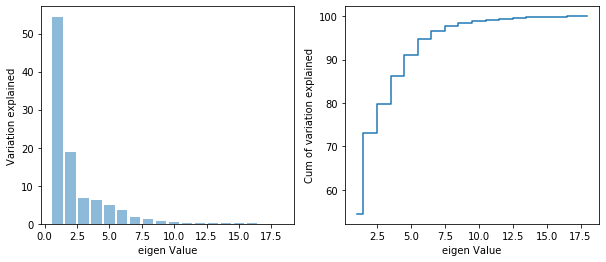

In [118]:
cov_matrix = np.cov(X_scaled_nout.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
plt.bar(range(1, eig_vals.size + 1),var_exp,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
ax2 = fig.add_subplot(122)
plt.step(range(1, eig_vals.size + 1),cum_var_exp, where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

There is steep drop in variance with increase in number of PC's. Post the value of 10 the cumulative variance is not increasing. Hence the components can be used as 6 which capture about 95% of the variance in the data

In [141]:
pca = PCA(n_components=6)
pca.fit(X_scaled_nout)
X_scaled_nout_pca= pca.transform(X_scaled_nout)

In [142]:
pca = PCA(n_components=6)
pca.fit(X_scaled_repout)
X_scaled_repout_pca= pca.transform(X_scaled_repout)

In [143]:
pca = PCA(n_components=6)
pca.fit(X_scaled_original)
X_scaled_original_pca= pca.transform(X_scaled_original)

In [144]:
pca = PCA(n_components=6)
pca.fit(X_original)
X_original_pca= pca.transform(X_original)

SVM with PCA applied on Dataset with Outliners dropped

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_nout_pca,Y_scaled_nout,test_size=0.30, random_state=1)
svc_nout = SVC()
svc_nout.fit(X_train, y_train)
print("Accuracy on training set with Outliners dropped after PCA: {:.2f}".format(svc_nout.score(X_train, y_train)*100))
print("Accuracy on test set with Outliners dropped after PCA: {:.2f}".format(svc_nout.score(X_test, y_test)*100))

y_predict_train = svc_nout.predict(X_train)
y_predict_test = svc_nout.predict(X_test)

accuracy_score_train=metrics.accuracy_score(y_train,y_predict_train)
accuracy_score_test=metrics.accuracy_score(y_test,y_predict_test)

model_score_nout_pca = svc_nout.score(X_test, y_test)

print("SVM Model Score for Dataset with Outliners dropped after PCA: {} \n".format(model_score_nout_pca*100))


Accuracy on training set with Outliners dropped: 95.45
Accuracy on test set with Outliners dropped: 91.87
SVM Model Score for Dataset with Outliners dropped : 91.869918699187 



SVM with PCA applied on Dataset with Outliners replaced with mean

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_repout_pca,Y_scaled_repout,test_size=0.30, random_state=1)
svc_repout = SVC()
svc_repout.fit(X_train, y_train)
print("Accuracy on training set with Outliners replaced with mean after PCA: {:.2f}".format(svc_repout.score(X_train, y_train)*100))
print("Accuracy on test set with Outliners replaced with mean after PCA: {:.2f}".format(svc_repout.score(X_test, y_test)*100))

y_predict_train = svc_repout.predict(X_train)
y_predict_test = svc_repout.predict(X_test)

accuracy_score_train=metrics.accuracy_score(y_train,y_predict_train)
accuracy_score_test=metrics.accuracy_score(y_test,y_predict_test)

model_score_repout_pca = svc_repout.score(X_test, y_test)

print("SVM Model Score for Dataset with Outliners replaced with mean after PCA : {} \n".format(model_score_repout*100))

Accuracy on training set with Outliners replaced with mean: 96.62
Accuracy on test set with Outliners replaced with mean: 92.91
SVM Model Score for Dataset with Outliners replaced with mean : 95.66929133858267 



SVM with PCA applied on Dataset with original Scaled Value

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_original_pca,Y_scaled_original,test_size=0.30, random_state=1)
svc_repout = SVC()
svc_repout.fit(X_train, y_train)
print("Accuracy on training set with Original Scaled data after PCA: {:.2f}".format(svc_repout.score(X_train, y_train)*100))
print("Accuracy on test set with Original Scaled data after PCA: {:.2f}".format(svc_repout.score(X_test, y_test)*100))

y_predict_train = svc_repout.predict(X_train)
y_predict_test = svc_repout.predict(X_test)

accuracy_score_train=metrics.accuracy_score(y_train,y_predict_train)
accuracy_score_test=metrics.accuracy_score(y_test,y_predict_test)

model_score_scaled_original_pca = svc_repout.score(X_test, y_test)

print("SVM Model Score for Dataset with Original Scaled data after PCA : {} \n".format(model_score_scaled_original_pca*100))

Accuracy on training set with Original Scaled data after PCA: 93.92
Accuracy on test set with Original Scaled data after PCA: 86.61
SVM Model Score for Dataset with Original Scaled data after PCA : 86.61417322834646 



SVM with PCA applied on Dataset with original Value

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_original_pca,Y_original,test_size=0.30, random_state=1)
svc_repout = SVC()
svc_repout.fit(X_train, y_train)
print("Accuracy on training set with Original data after PCA: {:.2f}".format(svc_repout.score(X_train, y_train)*100))
print("Accuracy on test set with Original data after PCA: {:.2f}".format(svc_repout.score(X_test, y_test)*100))

y_predict_train = svc_repout.predict(X_train)
y_predict_test = svc_repout.predict(X_test)

accuracy_score_train=metrics.accuracy_score(y_train,y_predict_train)
accuracy_score_test=metrics.accuracy_score(y_test,y_predict_test)

model_score_original_pca = svc_repout.score(X_test, y_test)

print("SVM Model Score for Dataset with Original data after PCA : {} \n".format(model_score_original_pca*100))

Accuracy on training set with Original data after PCA: 100.00
Accuracy on test set with Original data after PCA: 52.76
SVM Model Score for Dataset with Original data after PCA : 52.75590551181102 



In [ ]:
# K fold Validtion on Dataset with Outliners dropped after PCA

In [175]:
kfold = KFold(n_splits=20, random_state=1)
model = SVC()
results_nout_pca = cross_val_score(model, X_scaled_nout_pca, Y_scaled_nout, cv=kfold)
print(results_nout_pca)
print("Accuracy of K fold Validtion on Dataset with Outliners dropped after PCA: %.3f%% (%.3f%%)" % (results_nout_pca.mean()*100.0, results_nout_pca.std()*100.0))

[0.90243902 0.92682927 0.92682927 0.97560976 0.97560976 0.87804878
 0.87804878 0.97560976 0.90243902 0.95121951 0.95121951 0.95121951
 0.87804878 0.97560976 0.82926829 0.92682927 0.97560976 0.97560976
 0.9        0.9       ]
Accuracy of K fold Validtion on Dataset with Outliners dropped after PCA: 92.780% (4.203%)


In [ ]:
# K fold Validtion on Dataset with Outliners replaced with mean after PCA

In [176]:
kfold = KFold(n_splits=20, random_state=1)
model = SVC()
results_repout_pca = cross_val_score(model, X_scaled_repout_pca, Y_scaled_repout, cv=kfold)
print(results_repout_pca)
print("Accuracy of K fold Validtion on Dataset with Outliners replaced with mean after PCA: %.3f%% (%.3f%%)" % (results_repout_pca.mean()*100.0, results_repout_pca.std()*100.0))

[0.90697674 0.93023256 0.90697674 0.97674419 0.97674419 0.90697674
 0.88095238 1.         0.9047619  0.95238095 0.95238095 0.95238095
 0.83333333 0.97619048 0.85714286 0.92857143 0.97619048 0.97619048
 0.88095238 0.9047619 ]
Accuracy of K fold Validtion on Dataset with Outliners replaced with mean after PCA: 92.904% (4.443%)


 K fold Validtion on Dataset with original scaled after PCA

In [177]:
kfold = KFold(n_splits=20, random_state=1)
model = SVC()
results_scaled_original_pca = cross_val_score(model, X_scaled_original_pca, Y_scaled_original, cv=kfold)
print(results_scaled_original_pca)
print("Accuracy of K fold Validtion on Dataset with original scaled ater PCA: %.3f%% (%.3f%%)" % (results_scaled_original_pca.mean()*100.0, results_scaled_original_pca.std()*100.0))

[0.90697674 0.95348837 0.86046512 0.8372093  0.97674419 0.86046512
 0.85714286 0.97619048 0.92857143 0.83333333 0.95238095 0.97619048
 0.85714286 0.95238095 0.80952381 0.85714286 0.95238095 0.95238095
 0.85714286 0.92857143]
Accuracy of K fold Validtion on Dataset with original scaled ater PCA: 90.429% (5.463%)


K fold Validtion on Dataset with original scaled after PCA

In [178]:
kfold = KFold(n_splits=20, random_state=1)
model = SVC()
results_original_pca = cross_val_score(model, X_original_pca, Y_original, cv=kfold)
print(results_original_pca)
print("Accuracy of K fold Validtion on Dataset with Original Data after PCA: %.3f%% (%.3f%%)" % (results_original_pca.mean()*100.0, results_original_pca.std()*100.0))

[0.37209302 0.46511628 0.37209302 0.60465116 0.44186047 0.48837209
 0.38095238 0.45238095 0.61904762 0.52380952 0.52380952 0.64285714
 0.5        0.66666667 0.54761905 0.57142857 0.5        0.45238095
 0.5        0.57142857]
Accuracy of K fold Validtion on Dataset with Original Data after PCA: 50.983% (8.401%)


Conclusion Summary:

In [192]:
print("Accuracy score of SVM model on Dataset with Outliners dropped : {}".format(model_score_nout*100))
print("Accuracy score of SVM model on Dataset with Outliners replaced with mean : {}".format(model_score_repout*100))
print("Accuracy score of SVM model on Original Scaled Dataset: {}".format(model_score_scal_orig*100))
print("Accuracy score of SVM model on Original Dataset: {}".format(model_score_svc_orig*100))

print("\nAccuracy of K fold Validtion on Dataset with Outliners dropped: %.3f%% (%.3f%%)" % (results_nout.mean()*100.0, results_nout.std()*100.0))
print("Accuracy of K fold Validtion on Dataset with Outliners replaced with mean: %.3f%% (%.3f%%)" % (results_repout.mean()*100.0, results_repout.std()*100.0))
print("Accuracy of K fold Validtion on Original Scaled Dataset: %.3f%% (%.3f%%)" % (results_scaled_original.mean()*100.0, results_scaled_original.std()*100.0))
print("Accuracy of K fold Validtion on Original Dataset: %.3f%% (%.3f%%)" % (results_original.mean()*100.0, results_original.std()*100.0))


print("\nAccuracy score of SVM model on Dataset with Outliners dropped after PCA : {}".format(model_score_nout_pca*100))
print("Accuracy score of SVM model on Dataset with Outliners replaced with mean after PCA : {}".format(model_score_repout_pca*100))
print("Accuracy score of SVM model on Original Scaled Dataset after PCA: {}".format(model_score_scaled_original_pca*100))
print("Accuracy score of SVM model on Original Dataset after PCA: {}".format(model_score_original_pca*100))


print("\nAccuracy of K fold Validtion on Dataset with Outliners dropped after PCA : %.3f%% (%.3f%%)" % (results_nout_pca.mean()*100.0, results_nout_pca.std()*100.0))
print("Accuracy of K fold Validtion on Dataset with Outliners replaced with mean after PCA : %.3f%% (%.3f%%)" % (results_repout_pca.mean()*100.0, results_repout_pca.std()*100.0))
print("Accuracy of K fold Validtion on Original Scaled Dataset after PCA : %.3f%% (%.3f%%)" % (results_scaled_original_pca.mean()*100.0, results_scaled_original_pca.std()*100.0))
print("Accuracy of K fold Validtion on Original Dataset after PCA: %.3f%% (%.3f%%)" % (results_original_pca.mean()*100.0, results_original_pca.std()*100.0))


Accuracy score of SVM model on Dataset with Outliners dropped : 97.5609756097561
Accuracy score of SVM model on Dataset with Outliners replaced with mean : 95.66929133858267
Accuracy score of SVM model on Original Scaled Dataset: 94.88188976377953
Accuracy score of SVM model on Original Dataset: 52.75590551181102

Accuracy of K fold Validtion on Dataset with Outliners dropped: 97.192% (2.349%)
Accuracy of K fold Validtion on Dataset with Outliners replaced with mean: 96.581% (2.818%)
Accuracy of K fold Validtion on Original Scaled Dataset: 96.229% (2.264%)
Accuracy of K fold Validtion on Original Dataset: 50.983% (8.401%)

Accuracy score of SVM model on Dataset with Outliners dropped after PCA : 91.869918699187
Accuracy score of SVM model on Dataset with Outliners replaced with mean after PCA : 92.91338582677166
Accuracy score of SVM model on Original Scaled Dataset after PCA: 86.61417322834646
Accuracy score of SVM model on Original Dataset after PCA: 52.75590551181102

Accuracy of K 

Conclusion:

    SVM model after dropping the outliners is giving around 97.56% accuracy without PCA. This model perform best.